In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
path = r'../input/weather-dataset/dataset'

train_dataset = image_dataset_from_directory(path,
                                            seed = 2059,
                                            image_size = (128, 128),
                                            batch_size = 256,
                                            validation_split=0.2,
                                            subset= "training")


valid_dataset = image_dataset_from_directory(path,
                                            seed = 2059,
                                            image_size = (128, 128),
                                            batch_size = 256,
                                            validation_split=0.2,
                                            subset= "validation")

Found 6877 files belonging to 11 classes.
Using 5502 files for training.


2021-11-22 07:15:15.679954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 07:15:15.800226: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 07:15:15.800959: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 07:15:15.804488: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 6877 files belonging to 11 classes.
Using 1375 files for validation.


In [3]:
labels = train_dataset.class_names
print(len(labels))

11


In [4]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

for layer in vgg16.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [5]:
model = Sequential([
    
RandomFlip('horizontal_and_vertical'),
RandomContrast(0.5),
RandomRotation(0.2),
RandomZoom(0.5, 0.2),

vgg16,

Flatten(),

Dense(128, activation = 'relu'),

Dense(len(labels), activation = 'softmax')
])

In [6]:
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *

model.compile(optimizer = Adam(learning_rate = 0.001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [7]:
callbacks = EarlyStopping(
            
            min_delta = 0.001,
            patience = 10,
            restore_best_weights = True)

In [8]:
history = model.fit(x = train_dataset,
                   epochs = 20,
                   callbacks = [callbacks],
                   validation_data = valid_dataset)

Epoch 1/20


2021-11-22 07:15:20.681673: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-22 07:15:30.882651: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 2045 of 2048
2021-11-22 07:15:30.888882: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.
2021-11-22 07:15:32.862139: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


 3/22 [===>..........................] - ETA: 30s - loss: 17.0032 - accuracy: 0.2031

2021-11-22 07:15:48.934937: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 28s - loss: 15.9949 - accuracy: 0.2207

2021-11-22 07:15:50.129708: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 5.7272 - accuracy: 0.4060

2021-11-22 07:16:08.954959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 59s 2s/step - loss: 5.7272 - accuracy: 0.4060 - val_loss: 1.5631 - val_accuracy: 0.5084
Epoch 2/20
 3/22 [===>..........................] - ETA: 12s - loss: 1.6090 - accuracy: 0.4596

2021-11-22 07:16:24.708305: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 1.5478 - accuracy: 0.4697

2021-11-22 07:16:25.255291: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 1.4627 - accuracy: 0.5331

2021-11-22 07:16:33.313705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 634ms/step - loss: 1.4627 - accuracy: 0.5331 - val_loss: 1.2330 - val_accuracy: 0.6451
Epoch 3/20
 3/22 [===>..........................] - ETA: 12s - loss: 1.2671 - accuracy: 0.6094

2021-11-22 07:16:43.548127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 1.2373 - accuracy: 0.6211

2021-11-22 07:16:44.108269: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 1.1804 - accuracy: 0.6376

2021-11-22 07:16:51.848551: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 616ms/step - loss: 1.1804 - accuracy: 0.6376 - val_loss: 1.1262 - val_accuracy: 0.6829
Epoch 4/20
 3/22 [===>..........................] - ETA: 12s - loss: 1.0516 - accuracy: 0.6849

2021-11-22 07:17:01.509990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 14s - loss: 1.0487 - accuracy: 0.6768

2021-11-22 07:17:02.243394: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 1.0959 - accuracy: 0.6663

2021-11-22 07:17:09.937366: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 19s 667ms/step - loss: 1.0959 - accuracy: 0.6663 - val_loss: 1.1146 - val_accuracy: 0.7004
Epoch 5/20
 3/22 [===>..........................] - ETA: 13s - loss: 1.0692 - accuracy: 0.6706

2021-11-22 07:17:21.783992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 1.0173 - accuracy: 0.6816

2021-11-22 07:17:22.345645: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.9863 - accuracy: 0.6939

2021-11-22 07:17:30.551610: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 642ms/step - loss: 0.9863 - accuracy: 0.6939 - val_loss: 1.0061 - val_accuracy: 0.7156
Epoch 6/20
 3/22 [===>..........................] - ETA: 13s - loss: 0.9024 - accuracy: 0.7083

2021-11-22 07:17:40.344882: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.9090 - accuracy: 0.7109

2021-11-22 07:17:40.895813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.9170 - accuracy: 0.7101

2021-11-22 07:17:49.461731: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 19s 652ms/step - loss: 0.9170 - accuracy: 0.7101 - val_loss: 0.9661 - val_accuracy: 0.7244
Epoch 7/20
 3/22 [===>..........................] - ETA: 12s - loss: 0.9268 - accuracy: 0.6979

2021-11-22 07:17:59.084431: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.8701 - accuracy: 0.7139

2021-11-22 07:17:59.677406: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.8562 - accuracy: 0.7354

2021-11-22 07:18:07.483992: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 628ms/step - loss: 0.8562 - accuracy: 0.7354 - val_loss: 0.9891 - val_accuracy: 0.7200
Epoch 8/20
 3/22 [===>..........................] - ETA: 16s - loss: 0.8476 - accuracy: 0.7240

2021-11-22 07:18:17.392736: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 15s - loss: 0.8331 - accuracy: 0.7207

2021-11-22 07:18:17.952072: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.8413 - accuracy: 0.7279

2021-11-22 07:18:25.892582: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 641ms/step - loss: 0.8413 - accuracy: 0.7279 - val_loss: 0.9095 - val_accuracy: 0.7360
Epoch 9/20
 3/22 [===>..........................] - ETA: 12s - loss: 0.7929 - accuracy: 0.7487

2021-11-22 07:18:37.396133: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.7616 - accuracy: 0.7549

2021-11-22 07:18:37.938595: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.8115 - accuracy: 0.7388

2021-11-22 07:18:45.887054: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 632ms/step - loss: 0.8115 - accuracy: 0.7388 - val_loss: 0.9022 - val_accuracy: 0.7447
Epoch 10/20
 3/22 [===>..........................] - ETA: 12s - loss: 0.7652 - accuracy: 0.7500

2021-11-22 07:18:57.936084: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.7485 - accuracy: 0.7510

2021-11-22 07:18:58.486762: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.7928 - accuracy: 0.7472

2021-11-22 07:19:06.650571: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 630ms/step - loss: 0.7928 - accuracy: 0.7472 - val_loss: 0.9231 - val_accuracy: 0.7389
Epoch 11/20
 3/22 [===>..........................] - ETA: 12s - loss: 0.7947 - accuracy: 0.7448

2021-11-22 07:19:16.197566: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.7646 - accuracy: 0.7578

2021-11-22 07:19:16.741515: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.7447 - accuracy: 0.7535

2021-11-22 07:19:25.073281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 635ms/step - loss: 0.7447 - accuracy: 0.7535 - val_loss: 0.8400 - val_accuracy: 0.7418
Epoch 12/20
 3/22 [===>..........................] - ETA: 14s - loss: 0.6321 - accuracy: 0.7930

2021-11-22 07:19:36.617190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 14s - loss: 0.6057 - accuracy: 0.7998

2021-11-22 07:19:37.166244: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.7270 - accuracy: 0.7595

2021-11-22 07:19:44.793290: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 631ms/step - loss: 0.7270 - accuracy: 0.7595 - val_loss: 0.8531 - val_accuracy: 0.7367
Epoch 13/20
 3/22 [===>..........................] - ETA: 13s - loss: 0.6511 - accuracy: 0.7878

2021-11-22 07:19:57.216820: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 14s - loss: 0.6537 - accuracy: 0.7842

2021-11-22 07:19:58.022766: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.7135 - accuracy: 0.7672

2021-11-22 07:20:05.863299: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 19s 638ms/step - loss: 0.7135 - accuracy: 0.7672 - val_loss: 0.8149 - val_accuracy: 0.7527
Epoch 14/20
 3/22 [===>..........................] - ETA: 13s - loss: 0.6571 - accuracy: 0.7799

2021-11-22 07:20:15.467636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.6899 - accuracy: 0.7744

2021-11-22 07:20:16.017010: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.7174 - accuracy: 0.7599

2021-11-22 07:20:24.083428: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 630ms/step - loss: 0.7174 - accuracy: 0.7599 - val_loss: 0.8741 - val_accuracy: 0.7396
Epoch 15/20
 3/22 [===>..........................] - ETA: 12s - loss: 0.7193 - accuracy: 0.7708

2021-11-22 07:20:36.239980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.6953 - accuracy: 0.7656

2021-11-22 07:20:36.792243: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.7028 - accuracy: 0.7606

2021-11-22 07:20:44.701001: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 617ms/step - loss: 0.7028 - accuracy: 0.7606 - val_loss: 0.7481 - val_accuracy: 0.7687
Epoch 16/20
 3/22 [===>..........................] - ETA: 13s - loss: 0.6221 - accuracy: 0.7773

2021-11-22 07:20:54.210434: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.6623 - accuracy: 0.7725

2021-11-22 07:20:54.763996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.6516 - accuracy: 0.7792

2021-11-22 07:21:02.950542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 19s 654ms/step - loss: 0.6516 - accuracy: 0.7792 - val_loss: 0.8176 - val_accuracy: 0.7665
Epoch 17/20
 3/22 [===>..........................] - ETA: 13s - loss: 0.6077 - accuracy: 0.7721

2021-11-22 07:21:14.533355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 14s - loss: 0.6367 - accuracy: 0.7666

2021-11-22 07:21:15.226619: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.6488 - accuracy: 0.7763

2021-11-22 07:21:22.910671: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 630ms/step - loss: 0.6488 - accuracy: 0.7763 - val_loss: 0.7822 - val_accuracy: 0.7673
Epoch 18/20
 3/22 [===>..........................] - ETA: 12s - loss: 0.5847 - accuracy: 0.8086

2021-11-22 07:21:35.401812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.5903 - accuracy: 0.8027

2021-11-22 07:21:35.962247: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.6147 - accuracy: 0.7866

2021-11-22 07:21:43.936202: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 621ms/step - loss: 0.6147 - accuracy: 0.7866 - val_loss: 0.7796 - val_accuracy: 0.7731
Epoch 19/20
 3/22 [===>..........................] - ETA: 13s - loss: 0.6347 - accuracy: 0.7839

2021-11-22 07:21:55.285999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.6652 - accuracy: 0.7764

2021-11-22 07:21:55.852563: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.6172 - accuracy: 0.7928

2021-11-22 07:22:04.050675: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 632ms/step - loss: 0.6172 - accuracy: 0.7928 - val_loss: 0.7355 - val_accuracy: 0.7644
Epoch 20/20
 3/22 [===>..........................] - ETA: 13s - loss: 0.6750 - accuracy: 0.7708

2021-11-22 07:22:15.894885: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


 4/22 [====>.........................] - ETA: 13s - loss: 0.6462 - accuracy: 0.7764

2021-11-22 07:22:16.448325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - ETA: 0s - loss: 0.6653 - accuracy: 0.7766

2021-11-22 07:22:24.370168: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


22/22 [==============================] - 18s 623ms/step - loss: 0.6653 - accuracy: 0.7766 - val_loss: 0.7308 - val_accuracy: 0.7738


In [9]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,5.727201,0.406034,1.563143,0.508364
1,1.462708,0.533079,1.232974,0.645091
2,1.180384,0.637586,1.126169,0.682909
3,1.095899,0.666303,1.114641,0.700364
4,0.986317,0.693929,1.006147,0.715636


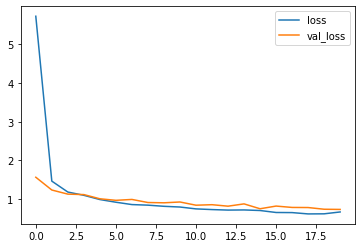

In [10]:
plt.plot(history_df.loc[ : , 'loss'], label = 'loss')
plt.plot(history_df.loc[ : , 'val_loss'], label = 'val_loss')
plt.legend()

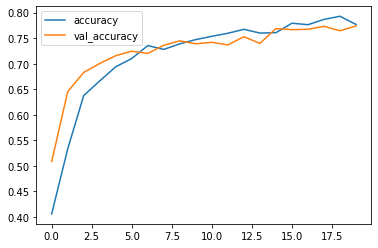

In [11]:
plt.plot(history_df.loc[ : , 'accuracy'], label = 'accuracy')
plt.plot(history_df.loc[ : , 'val_accuracy'], label = 'val_accuracy')
plt.legend()

Actual: rime
Predicted: rime


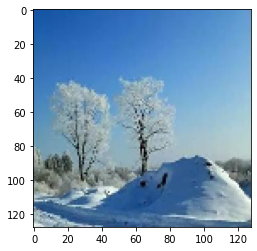

In [16]:
image_path = r'../input/weather-dataset/dataset/rime/4972.jpg'

img = image.load_img(image_path, target_size = (128, 128, 3))
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

images = np.vstack([x])

pred = model.predict(images, batch_size = 256)
label = np.argmax(pred, axis = 1)

print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+labels[np.argmax(pred)])